# Dataset details

In [ ]:
from google.colab import drive
import shutil
import pandas as pd
import numpy as np

# mount  Google Drive
drive.mount('/content/drive')
# unzip file
shutil.unpack_archive('/content/drive/MyDrive/datasets assessment1.zip')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data

df = pd.read_csv('/content/datasets assessment1/PT_Train.csv')
df

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0
...,...,...,...,...,...
221,17/08/2015 18:50,159,51,NaN,NaN
222,17/08/2015 18:51,151,64,NaN,NaN
223,17/08/2015 18:52,140,64,NaN,NaN
224,17/08/2015 18:53,140,55,NaN,NaN


In [ ]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [ ]:
#check for missing values of the dataset
print('\n'+('*'*35)+'The missing values of the dataset'+('*'*25))
print(df.isna().sum())

#check for missing values of the Lifetouch Heart Rate
print('\n'+f'The missing values of "Lifetouch Heart Rate" attribute: {df["Lifetouch Heart Rate"].isna().sum()}')



***********************************The missing values of the dataset*************************
Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

The missing values of "Lifetouch Heart Rate" attribute: 0


In [ ]:
# As the discribtion illustrate we have some values for 'Heart Rate' attribute which are 61442
#identify the index of the values 1st way
high_values = df[df['Lifetouch Heart Rate'] > 250]

print('\n'+('*'*15)+'The values which are higher than 61442'+('*'*15))
print(high_values)

#identify the index of the values 2nd way
print('\n'+('*'*15)+'The values which are higher than 61442 (index)'+('*'*15))
outlier = []
for i in range(0, len(df['Lifetouch Heart Rate'])):
  if df['Lifetouch Heart Rate'][i] > 250:
    outlier.append(i)

print(f'The outliers index {outlier}')


***************The values which are higher than 61442***************
     Timestamp (GMT)  Lifetouch Heart Rate  ...  Oximeter SpO2  Oximeter Pulse
30  17/08/2015 15:39                 61441  ...           94.0           152.0
31  17/08/2015 15:40                 61442  ...           92.0           146.0
32  17/08/2015 15:41                 61441  ...           -1.0            -1.0
33  17/08/2015 15:42                 61441  ...           98.0           143.0
34  17/08/2015 15:43                 61441  ...           97.0           142.0
35  17/08/2015 15:44                 61441  ...           96.0           140.0
36  17/08/2015 15:45                 61442  ...           96.0           144.0
41  17/08/2015 15:50                 61442  ...           94.0           148.0

[8 rows x 5 columns]

***************The values which are higher than 61442 (index)***************
The outliers index [30, 31, 32, 33, 34, 35, 36, 41]


In [ ]:
LHR = df[['Timestamp (GMT)', 'Lifetouch Heart Rate']]
LHR

,Timestamp (GMT),Lifetouch Heart Rate
0,17/08/2015 15:09,139
1,17/08/2015 15:10,144
2,17/08/2015 15:11,140
3,17/08/2015 15:12,138
4,17/08/2015 15:13,133
...,...,...
221,17/08/2015 18:50,159
222,17/08/2015 18:51,151
223,17/08/2015 18:52,140
224,17/08/2015 18:53,140


In [ ]:
left = []

for t in outlier:
  mean_left = LHR['Lifetouch Heart Rate'][t-20:t-15].mean()
  left.append(mean_left)
  
print(left)


[138.2, 138.8, 139.4, 139.6, 139.8, 139.0, 139.0, 134.2]


**Explained:** 

Since Time Series are sensitive over time, I use the neighbor in the series, get the corresponding mean, and replace the high values with this mean. If I replace the high values with the mean of the dataset\{high values}, the time series with index 31-36 and 41 will be constant over this period which means that sigma (or var = 0), which is something that must be avoided in time series

In [ ]:
LHR_outliers = LHR.copy()

#Convert the high values with the lesft 
for i in range(0, len(outlier)):
  LHR_outliers['Lifetouch Heart Rate'][outlier[i]] = int(left[i])
LHR_outliers.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Lifetouch Heart Rate
count,226.000000
mean,145.588496
std,11.225117
min,106.000000
25%,136.000000
50%,142.000000
75%,155.000000
max,172.000000


In [ ]:
#convert the 'Timestamp (GMT)' into an index
LHR_outliers.index = pd.to_datetime(LHR_outliers['Timestamp (GMT)'])
del LHR_outliers['Timestamp (GMT)']
LHR_outliers

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
...,...
2015-08-17 18:50:00,159
2015-08-17 18:51:00,151
2015-08-17 18:52:00,140


Text(0, 0.5, 'Lifetouch Heart Rate(LHR)')

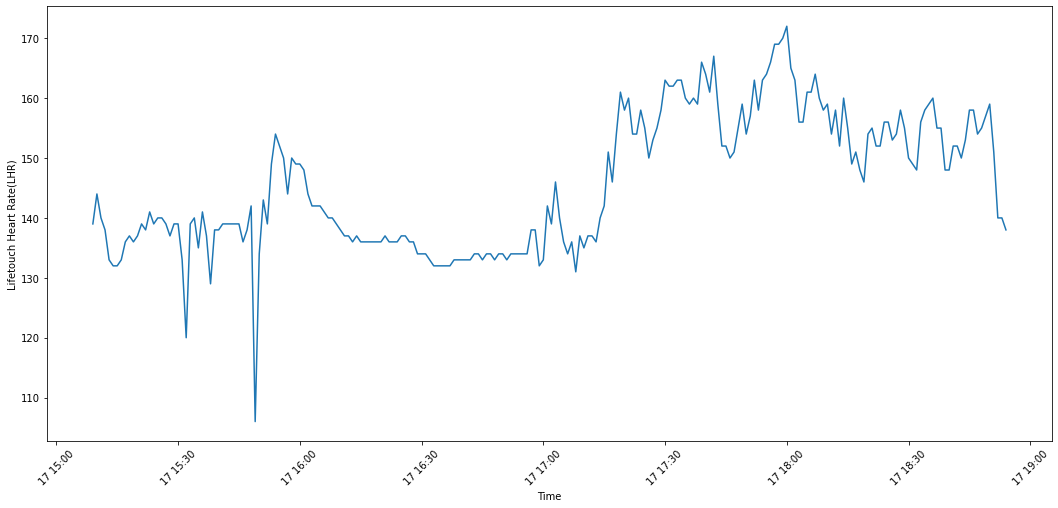

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
plt.plot(LHR_outliers)
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Lifetouch Heart Rate(LHR)')

# functions

**Augmentes Dickey-Fuller:**
[link text](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)

In [ ]:
#Check the stationarity of the time series
#Augmented Dickey-Fuller
from statsmodels.tsa.stattools import adfuller as adf

def Stationarity(attribute):
  results = adf(attribute)
  print('ADF Statistic: %f' % results[0])
  print('p-value: %f' % results[1])
  print('Critical Values:')
  for key, value in results[4].items():
      print('\t%s: %.3f' % (key, value))
  print(f'Result: The series is {"not " if results[1] > 0.05 else ""}stationary \n') 

In [ ]:
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

**Hurst Exponent** [link text](https://towardsdatascience.com/introduction-to-the-hurst-exponent-with-code-in-python-4da0414ca52e)

In [ ]:
!pip install hurst
#Check the stationarity of the time series
#Hurst exponent

import hurst
def Hurst_exponent(timeseries):
  H, c,data = hurst.compute_Hc(timeseries)
  print("H = {:.4f}, c = {:.4f}".format(H,c))
  print(f'Result: The series is {"" if H < 0.5 else "not"}stationary \n')

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

def plot_acf_pacf(timeseries):
  #acf, pacf
  acf_tm= acf(timeseries)
  pacf_tm = pacf(timeseries)

  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(211)
  fig = sm.graphics.tsa.plot_acf(timeseries, lags = 20, ax = ax1)
  ax2 = fig.add_subplot(212)
  fig = sm.graphics.tsa.plot_pacf(timeseries, lags = 20,ax = ax2)



In [ ]:

#second way to identify the p,d,q 
def train_test(dataset):

  #SPlit that data into train and test
  split = len(dataset) - int(0.2*len(dataset))
  print(f'Use {split} samples for training')
  print(f'Use {len(dataset) - split} samples for testing')
  return split


In [ ]:
def plot_train_test(train, test):
  plt.figure(figsize=(18, 6))
  plt.plot(train, color = "black")
  plt.plot(test, color = "red")
  plt.ylabel('Heart Rate')
  plt.xlabel('Time')
  plt.xticks(rotation=45)
  plt.title("Train/Test ")
  plt.show()

In [ ]:
 #identify the best order
def min_AIC(AIC, order):
  for i in range(0,len(AIC)):
    if AIC[i] == min(AIC):
      order_best, AIC_min =  order[i], AIC[i]
      print('The optimal p,q,d:')
      print(order_best, AIC_min)

# ARIMA

In [ ]:
LHR_arima = LHR_outliers.copy()

In [ ]:
# Check the stationarity
Stationarity(LHR_arima['Lifetouch Heart Rate'])
check_stationarity(LHR_arima['Lifetouch Heart Rate'])

ADF Statistic: -2.264955
p-value: 0.183520
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
Result: The series is not stationary 

p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


'If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing'

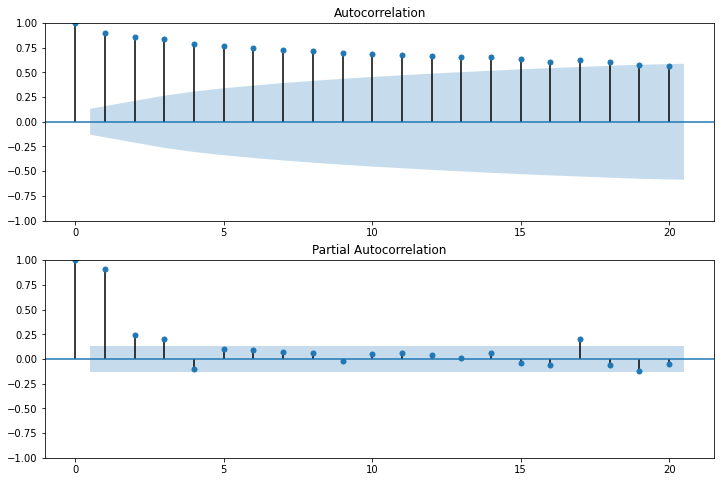

In [ ]:
plot_acf_pacf(LHR_arima)
'''If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing'''

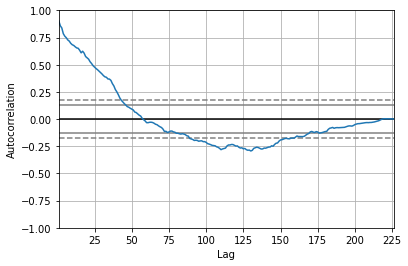

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(LHR_arima)

Use 181 samples for training
Use 45 samples for testing


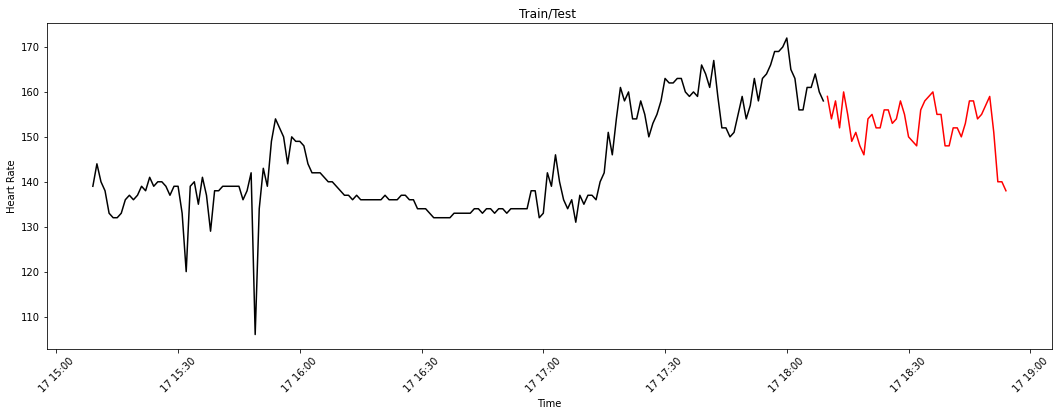

In [ ]:
split = train_test(LHR_arima)
train_arima = LHR_arima[:split]
test_arima = LHR_arima[split:]
plot_train_test(train_arima, test_arima)

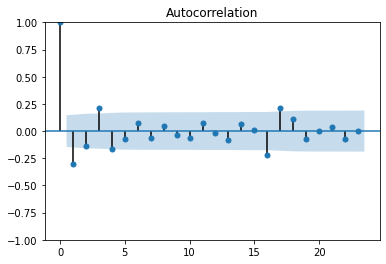

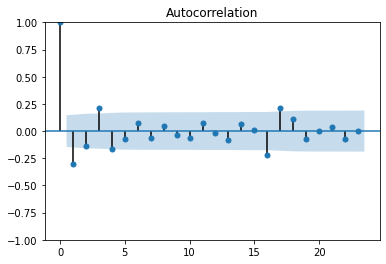

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series

# 1st Differencing
plot_acf(train_arima['Lifetouch Heart Rate'].diff().dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


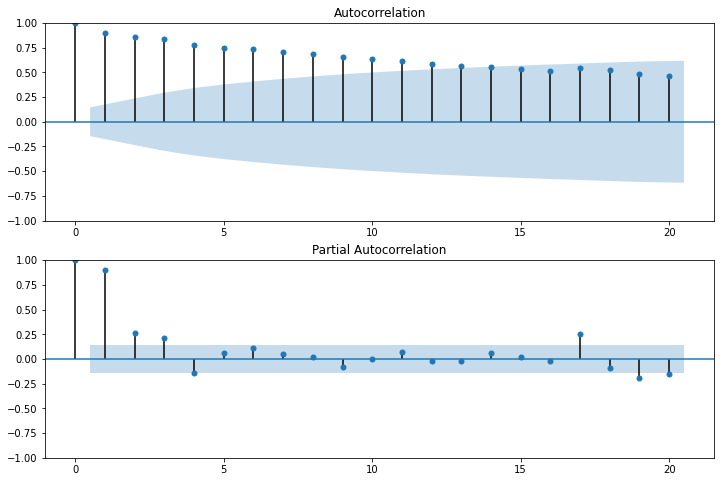

In [ ]:
plot_acf_pacf(train_arima['Lifetouch Heart Rate'])


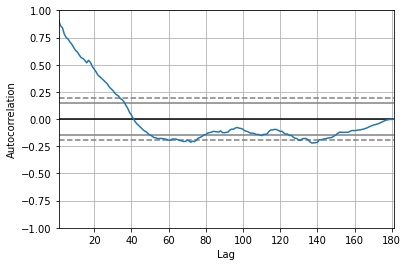

In [ ]:
autocorrelation_plot(train_arima['Lifetouch Heart Rate'])

In [ ]:
# 1,1,2 ARIMA Model
import statsmodels.api as sm
model_1 = sm.tsa.arima.ARIMA(LHR_arima, order=(15,1,2))
model_fit_1= model_1.fit()
print(model_fit_1.summary())
# Actual vs Fitted


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  226
Model:                  ARIMA(15, 1, 2)   Log Likelihood                -653.059
Date:                  Mon, 07 Feb 2022   AIC                           1342.118
Time:                          22:17:09   BIC                           1403.608
Sample:                      08-17-2015   HQIC                          1366.935
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0017      0.279     -3.596      0.000      -1.548      -0.456
ar.L2         -1.1702      0.284     -4.124      0.000      -1.726      -0.614
ar.L3         -0.3809      0.159    

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
rmse_list = []
pdq = []
p_values = [1,8,9,12,15, 16,20,20,21]
q_values = [1,2,3,4, 8,11,17,18, 20]

for p in p_values:
  for q in q_values: 
                arima_mod=sm.tsa.arima.ARIMA(train_arima,order = (p,1,q), enforce_stationarity = False )
                arima_fit = arima_mod.fit()
                yhat = arima_fit.forecast(len(test_arima))
                rmse = np.sqrt(mean_squared_error(test_arima,yhat))
                x1= p,1,q
                rmse_list.append(rmse)
                pdq.append(x1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [ ]:
for i in range(0, len(rmse_list)):
  if rmse_list[i] == min(rmse_list):
    print(i, pdq[i], rmse_list[i])

9 (8, 1, 1) 8.024480377450361


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  181
Model:                   ARIMA(8, 1, 1)   Log Likelihood                -507.260
Date:                  Mon, 07 Feb 2022   AIC                           1034.521
Time:                          22:20:42   BIC                           1065.996
Sample:                      08-17-2015   HQIC                          1047.291
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4910      2.381     -0.206      0.837      -5.159       4.177
ar.L2         -0.2897      0.888     -0.326      0.744      -2.029       1.450
ar.L3          0.0190      0.590    

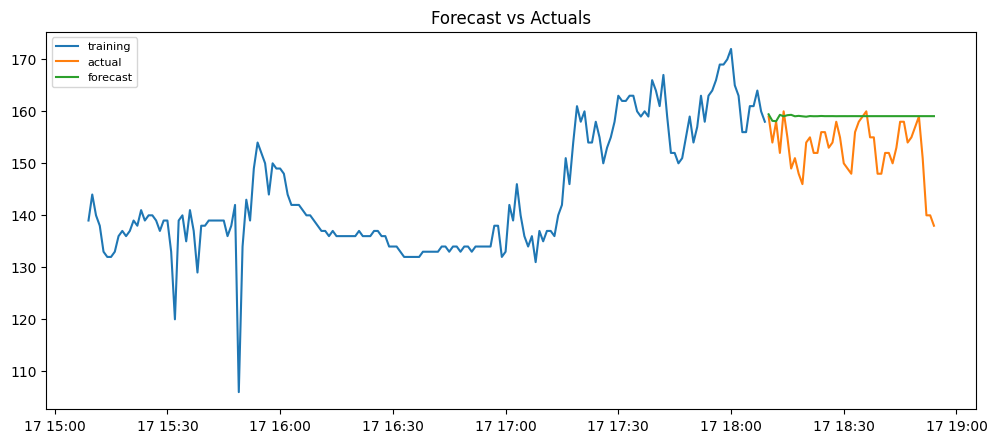

In [ ]:
# 1,1,2 ARIMA Model
model = sm.tsa.arima.ARIMA(train_arima, order=(8,1,1), enforce_stationarity= False)
model_fit = model.fit()
print(model_fit.summary())

# Forecast
fc_arma = model_fit.forecast(len(test_arima), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_arma = pd.Series(fc_arma, index=test_arima.index)
#lower_series = pd.Series(conf_arma[][:, 0], index=test_arima.index)
#upper_series = pd.Series(conf_arma[:, 1], index=test_arima.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_arima, label='training')
plt.plot(test_arima, label='actual')
plt.plot(fc_series_arma, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  181
Model:                 ARIMA(45, 1, 13)   Log Likelihood                -321.118
Date:                  Mon, 07 Feb 2022   AIC                            760.236
Time:                          22:21:11   BIC                            931.647
Sample:                      08-17-2015   HQIC                           829.893
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1934      0.411     -0.471      0.638      -0.999       0.612
ar.L2         -0.0982      0.416     -0.236      0.813      -0.913       0.717
ar.L3         -0.0528      0.367    

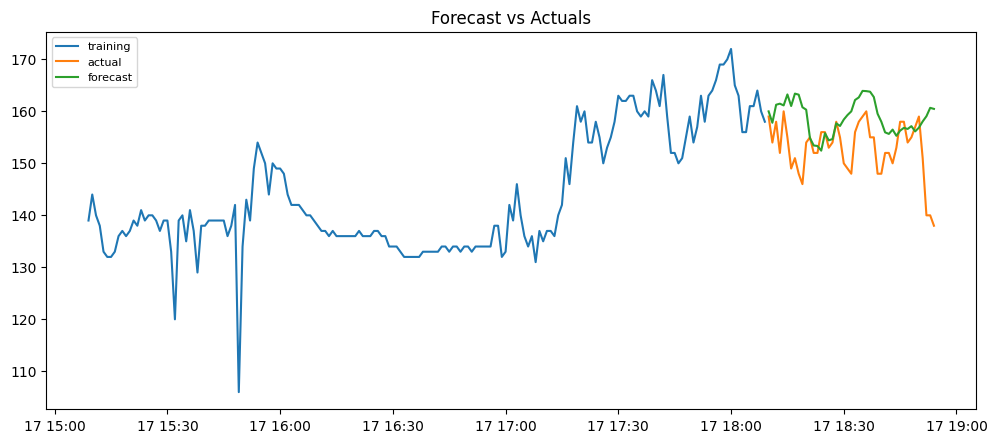

In [ ]:
# 1,1,2 ARIMA Model
model = sm.tsa.arima.ARIMA(train_arima, order=(45,1,13), enforce_stationarity= False, enforce_invertibility=False)
model_fit = model.fit()
print(model_fit.summary())

# Forecast
fc_arma = model_fit.forecast(len(test_arima), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_arma = pd.Series(fc_arma, index=test_arima.index)
#lower_series = pd.Series(conf_arma[][:, 0], index=test_arima.index)
#upper_series = pd.Series(conf_arma[:, 1], index=test_arima.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_arima, label='training')
plt.plot(test_arima, label='actual')
plt.plot(fc_series_arma, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
np.sqrt(mean_squared_error(fc_arma,test_arima))

8.472353672951217

In [ ]:
''' Our model is away one standar deveasion from the mean which indicates a good mode'''
LHR_arima['Lifetouch Heart Rate'].mean(), LHR_arima['Lifetouch Heart Rate'].var()

(145.58849557522123, 126.00324483775822)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  226
Model:                 ARIMA(45, 1, 13)   Log Likelihood                -456.597
Date:                  Mon, 07 Feb 2022   AIC                           1031.193
Time:                          22:21:45   BIC                           1219.578
Sample:                      08-17-2015   HQIC                          1107.575
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1208      1.157     -0.104      0.917      -2.389       2.147
ar.L2         -0.0300      1.259     -0.024      0.981      -2.497       2.437
ar.L3          0.2468      1.153    

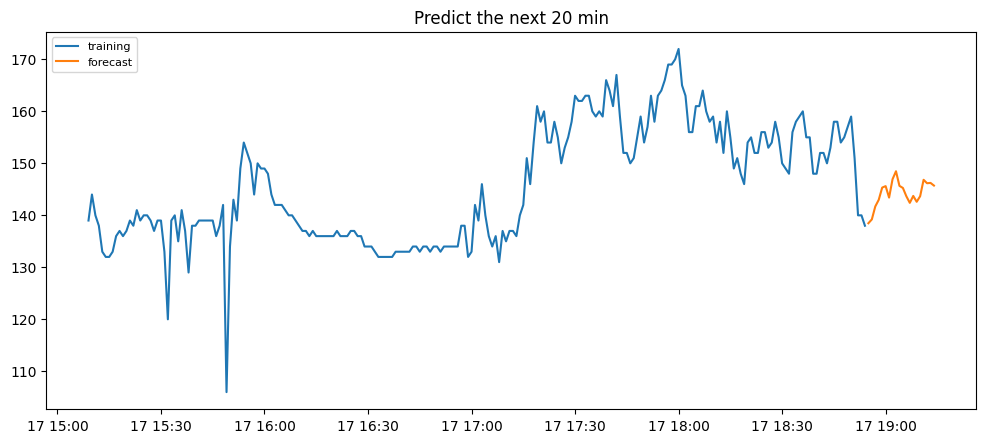

In [ ]:
optimal_arima = sm.tsa.arima.ARIMA(LHR_arima, order=(45,1,13), enforce_stationarity= False, enforce_invertibility=False)
optimal_arima_fit = optimal_arima.fit()
print(optimal_arima_fit.summary())

# Forecast
fc_arima_optimal = optimal_arima_fit.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series


rng_arima = pd.date_range('2015-08-17 18:55:00 ', periods=20, freq='T')
final_arima_prediction = pd.DataFrame({ 'Lifetouch Heart Rate': fc_arima_optimal }, index=rng_arima) 
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(LHR_arima, label='training')

plt.plot(final_arima_prediction, label='forecast')

plt.title('Predict the next 20 min')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#ARMA

In [ ]:
LHR_arma = LHR_outliers.copy()
Stationarity(LHR_arma['Lifetouch Heart Rate'])
check_stationarity(LHR_arma['Lifetouch Heart Rate'])

ADF Statistic: -2.264955
p-value: 0.183520
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
Result: The series is not stationary 

p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [ ]:

arma_log = np.log(LHR_arma)
check_stationarity(arma_log['Lifetouch Heart Rate'])
arma_diff = arma_log.diff()

p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [ ]:
check_stationarity(arma_diff['Lifetouch Heart Rate'][1:])
Stationarity(arma_diff['Lifetouch Heart Rate'][1:])

p value: 0.1
Result: The series is stationary 

ADF Statistic: -15.360755
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
Result: The series is stationary 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


Text(0, 0.5, 'Lifetouch Heart Rate(LHR)')

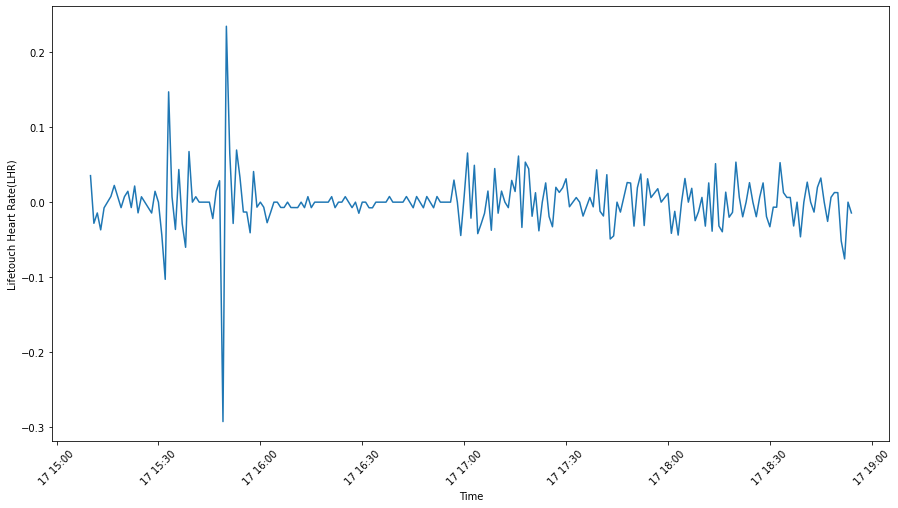

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(arma_diff)
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Lifetouch Heart Rate(LHR)')

In [ ]:
arma_dt  = arma_diff['Lifetouch Heart Rate'][1:].copy()
arma_dt

Timestamp (GMT)
2015-08-17 15:10:00    0.035339
2015-08-17 15:11:00   -0.028171
2015-08-17 15:12:00   -0.014389
2015-08-17 15:13:00   -0.036905
2015-08-17 15:14:00   -0.007547
                         ...   
2015-08-17 18:50:00    0.012658
2015-08-17 18:51:00   -0.051624
2015-08-17 18:52:00   -0.075637
2015-08-17 18:53:00    0.000000
2015-08-17 18:54:00   -0.014389
Name: Lifetouch Heart Rate, Length: 225, dtype: float64

Use 180 samples for training
Use 45 samples for testing


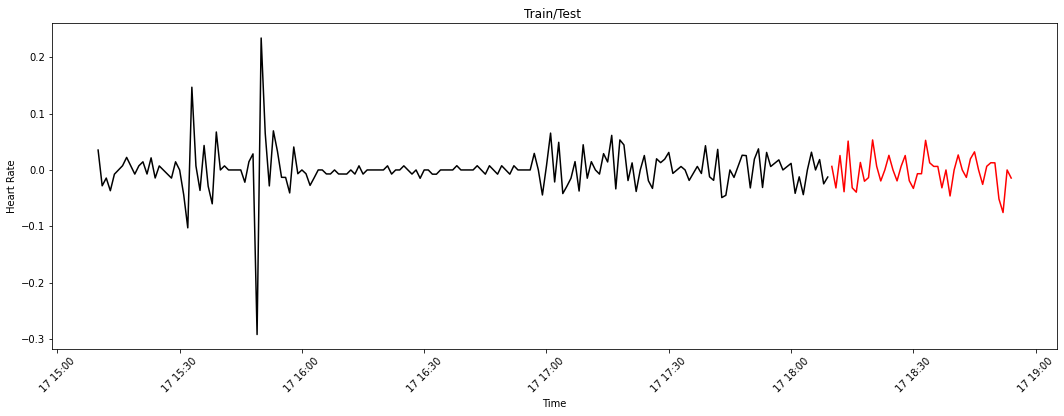

In [ ]:
# split the dataset
split_arma = train_test(arma_dt)
train_arma = arma_dt[:split_arma]
test_arma = arma_dt[split_arma:]
plot_train_test(train_arma, test_arma)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


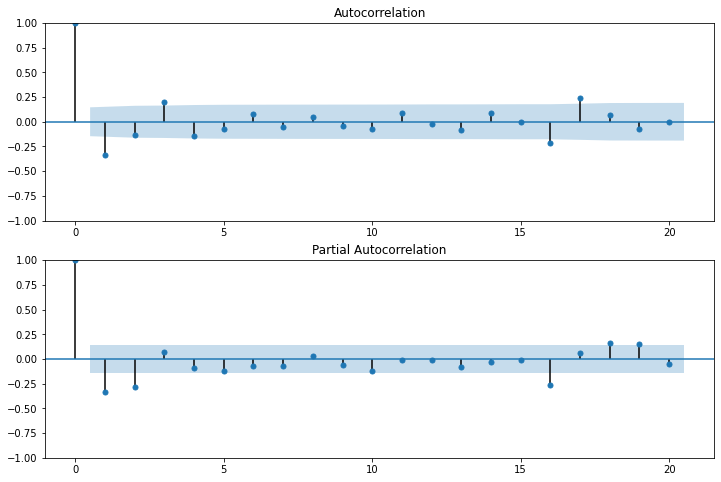

In [ ]:
plot_acf_pacf(train_arma)

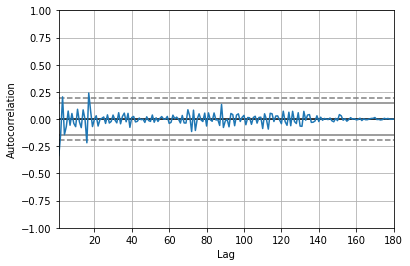

In [ ]:
autocorrelation_plot(train_arma)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters

                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  180
Model:                 ARIMA(29, 0, 28)   Log Likelihood                 367.421
Date:                  Mon, 07 Feb 2022   AIC                           -616.842
Time:                          22:33:28   BIC                           -428.457
Sample:                      08-17-2015   HQIC                          -540.460
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.279      0.780      -0.003       0.004
ar.L1         -0.2506     15.654     -0.016      0.987     -30.932      30.431
ar.L2         -0.0273     15.806    

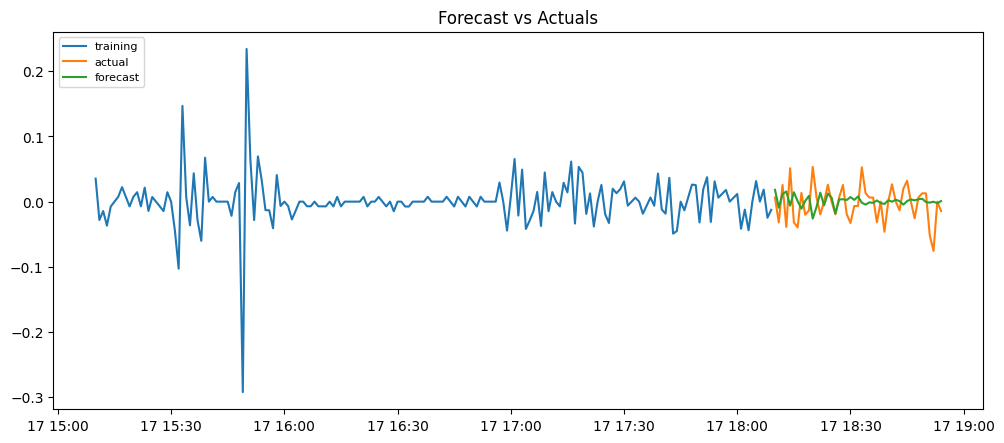

In [ ]:
import statsmodels.api as sm
arma_model1 = sm.tsa.arima.ARIMA(train_arma, order = (29,0,28)) #19,0,18
arma_fit = arma_model1.fit()
print(arma_fit.summary())

fc_armadt = arma_fit.forecast(len(test_arma), alpha=0.05)  # 95% conf

fc_series_armadt = pd.Series(fc_armadt, index=test_arma.index)
#lower_series_armadt = pd.Series(conf_arma[:, 0], index=test_arma.index)
#upper_series_arma_dt = pd.Series(conf_arma[:, 1], index=test_arma.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_arma, label='training')
plt.plot(test_arma, label='actual')
plt.plot(fc_series_armadt, label='forecast')
#plt.fill_between(lower_series_armadt.index, lower_series_armadt, upper_series_arma_dt, color='k', alpha=.15)
                 
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
np.sqrt(mean_squared_error(fc_armadt, test_arma))

0.030341907193782915

In [ ]:
''' Our model is away one standar deveasion from the mean which indicates a good mode'''
arma_dt.mean(), arma_dt.var()

(-3.208999099327296e-05, 0.0013410173568095156)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  225
Model:                 ARIMA(29, 0, 28)   Log Likelihood                 403.304
Date:                  Mon, 07 Feb 2022   AIC                           -688.608
Time:                          22:42:15   BIC                           -495.199
Sample:                      08-17-2015   HQIC                          -610.306
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.427      0.669      -0.002       0.003
ar.L1          0.3084      1.837      0.168      0.867      -3.292       3.909
ar.L2          0.0898      1.406    

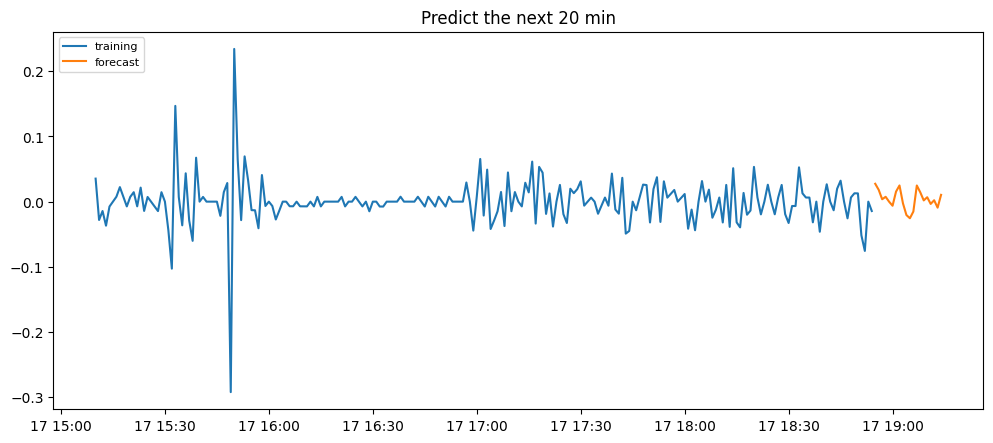

In [ ]:
optimal_arma = sm.tsa.arima.ARIMA(arma_dt, order=(29,0,28), enforce_stationarity= False, enforce_invertibility=False)
optimal_arma_fit = optimal_arma.fit()
print(optimal_arma_fit.summary())

# Forecast
fc_arma_optimal = optimal_arma_fit.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series


rng_arma = pd.date_range('2015-08-17 18:55:00 ', periods=20, freq='T')
final_arma_prediction = pd.DataFrame({ 'Lifetouch Heart Rate': fc_arma_optimal }, index=rng_arma) 
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(arma_dt, label='training')

plt.plot(final_arma_prediction, label='forecast')

plt.title('Predict the next 20 min')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#merge the 2 datasets
frames = [arma_diff,final_arma_prediction]
result = pd.concat(frames)
result

,Lifetouch Heart Rate
2015-08-17 15:09:00,NaN
2015-08-17 15:10:00,0.035339
2015-08-17 15:11:00,-0.028171
2015-08-17 15:12:00,-0.014389
2015-08-17 15:13:00,-0.036905
...,...
2015-08-17 19:10:00,0.006775
2015-08-17 19:11:00,-0.003501
2015-08-17 19:12:00,0.002124
2015-08-17 19:13:00,-0.009244


In [ ]:
# reverse the dataset predicted values 
result['Lifetouch Heart Rate'][0] = np.log(LHR_arma['Lifetouch Heart Rate'][0])
res_final = np.exp(result.cumsum())
res_final

,Lifetouch Heart Rate
2015-08-17 15:09:00,139.000000
2015-08-17 15:10:00,144.000000
2015-08-17 15:11:00,140.000000
2015-08-17 15:12:00,138.000000
2015-08-17 15:13:00,133.000000
...,...
2015-08-17 19:10:00,148.639557
2015-08-17 19:11:00,148.120146
2015-08-17 19:12:00,148.435049
2015-08-17 19:13:00,147.069308


# Exponential Smothing with ARIMA

In [ ]:
LHR_ex = LHR_outliers.copy()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """


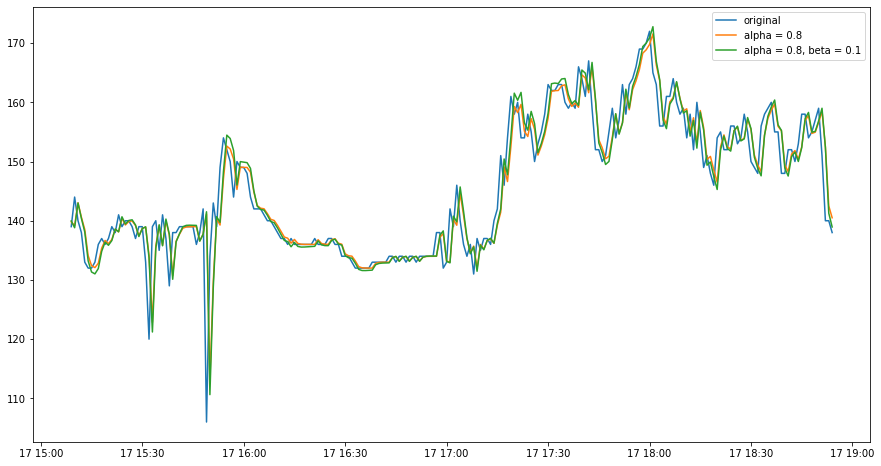

In [ ]:
#use exponential smoothing and arima for the forecast
from statsmodels.tsa.api import  SimpleExpSmoothing, Holt

simple= SimpleExpSmoothing(LHR_ex).fit(smoothing_level=0.8) #alpha = 0.8
double = Holt(LHR_ex).fit(smoothing_level=0.8, smoothing_slope=0.1) #alpha = 0.8, beta = 0.1

fig, ax = plt.subplots(figsize=(15, 8)) 
ax.plot(LHR_ex, label='original')
plt.plot( simple.fittedvalues, label = 'alpha = 0.8')
plt.plot( double.fittedvalues, label = 'alpha = 0.8, beta = 0.1')
plt.legend()
plt.show()

In [ ]:
arima_df = double.fittedvalues
arima_df

Timestamp (GMT)
2015-08-17 15:09:00    139.966561
2015-08-17 15:10:00    138.817456
2015-08-17 15:11:00    143.002239
2015-08-17 15:12:00    140.399016
2015-08-17 15:13:00    138.086450
                          ...    
2015-08-17 18:50:00    156.875613
2015-08-17 18:51:00    159.001477
2015-08-17 18:52:00    152.386532
2015-08-17 18:53:00    141.272620
2015-08-17 18:54:00    138.948028
Length: 226, dtype: float64

In [ ]:
Stationarity(arima_df)
check_stationarity(arima_df)

ADF Statistic: -2.098983
p-value: 0.244924
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
Result: The series is not stationary 

p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Use 181 samples for training
Use 45 samples for testing


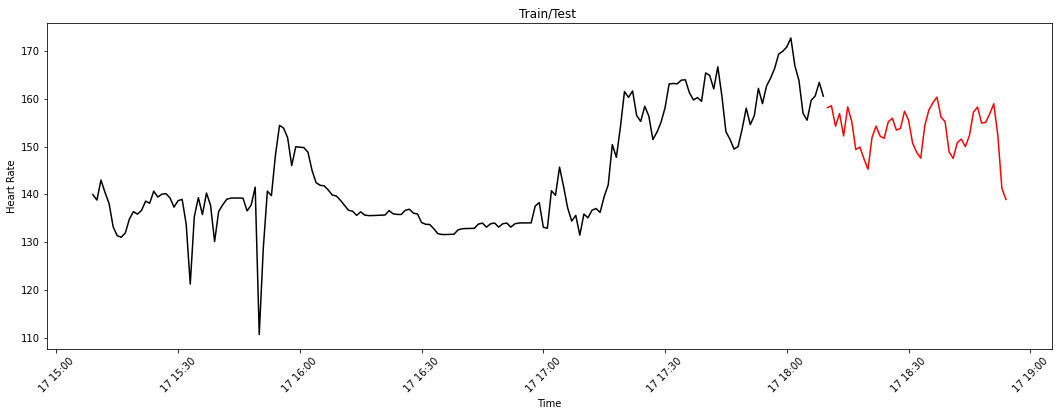

In [ ]:
split_ex = train_test(arima_df)
train_ex = arima_df[:split_ex]
test_ex = arima_df[split_ex:]
plot_train_test(train_ex, test_ex)

In [ ]:
rmse_ex_list = []
pdq_ex = []
for p in range(10):
    for d in range(1,2):
        for q in range(10):
                arima_ex=sm.tsa.arima.ARIMA(train_ex,order = (p,d,q), enforce_invertibility= False, enforce_stationarity = False)
                arima_ex_fit = arima_ex.fit()
                yhat_ex = arima_ex_fit.forecast(len(test_ex), alpha = 0.5)
                y1= p,d,q
                rmse_ex = np.sqrt(mean_squared_error(test_ex,yhat_ex))
                pdq_ex.append(y1)
                rmse_ex_list.append(rmse_ex)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [ ]:
for t in range(0,len(rmse_ex_list)):
  if rmse_ex_list[t] == min(rmse_ex_list):
    print(t, pdq_ex[t], rmse_ex_list[t])

50 (5, 1, 0) 8.337648220514978


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


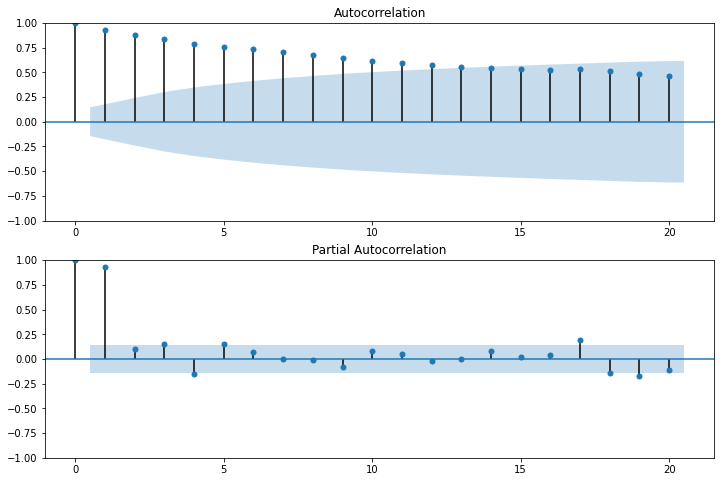

In [ ]:
plot_acf_pacf(train_ex)

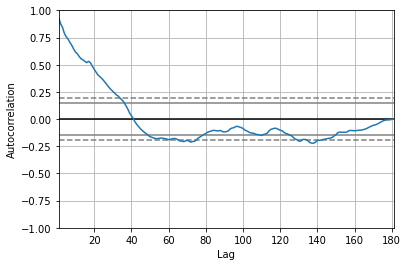

In [ ]:
autocorrelation_plot(train_ex)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  181
Model:               ARIMA(10, 1, 38)   Log Likelihood                -349.662
Date:                Mon, 07 Feb 2022   AIC                            797.323
Time:                        23:09:12   BIC                            941.813
Sample:                    08-17-2015   HQIC                           856.039
                         - 08-17-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6654      0.507     -1.312      0.189      -1.659       0.328
ar.L2          0.1776      0.562      0.316      0.752      -0.923       1.279
ar.L3          0.1224      0.286      0.427      0.6

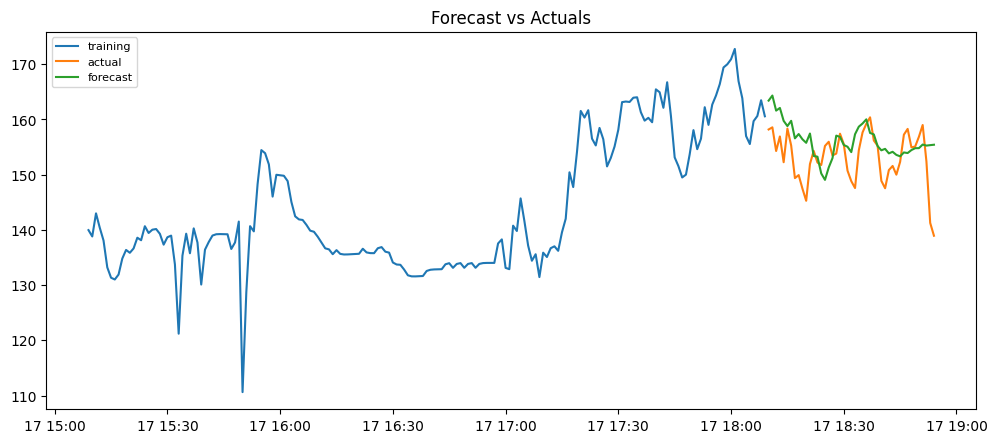

In [ ]:
# Build Model
model_arima_ex = sm.tsa.arima.ARIMA(train_ex, order=(10,1, 38), enforce_invertibility= False, enforce_stationarity=False)  
fitted_arima_ex = model_arima_ex.fit()  
print(fitted_arima_ex.summary())

# Forecast
fc_arima_ex = fitted_arima_ex.forecast(len(test_ex), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_arima_ex = pd.Series(fc_arima_ex, index=test_ex.index)
#lower_series_ex = pd.Series(conf_arima_ex[:, 0], index=test_ex.index)
#upper_series_ex = pd.Series(conf_arima_ex[:, 1], index=test_ex.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ex, label='training')
plt.plot(test_ex, label='actual')
plt.plot(fc_series_arima_ex, label='forecast')
#plt.fill_between(lower_series_ex.index, lower_series_ex, upper_series_ex,  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# predict the next 20 minutes 
#best Arima model forecast out- of sample 
optimal_ex = sm.tsa.arima.ARIMA(LHR_ex, order=(10,1, 38), enforce_invertibility= False, enforce_stationarity=False) 
optimal_fit_ex = optimal_ex.fit()

print(optimal_fit_ex.summary())
#predict the next 20 min
fc_20_ex = optimal_fit_ex.forecast(steps = 20, alpha=0.05) 
rng_ex = pd.date_range('2015-08-17 18:55:00 ', periods=20, freq='T')
final_ex_prediction = pd.DataFrame({ 'Lifetouch Heart Rate': fc_20_ex }, index=rng_ex)  

print('\n'+("*"*25)+' Summary '+('*'*25))
print(optimal_fit_ex.summary())
print('\n'+("*"*25)+' Next 20 minutes '+('*'*25))
print(final_ex_prediction)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  226
Model:                 ARIMA(10, 1, 38)   Log Likelihood                -491.745
Date:                  Mon, 07 Feb 2022   AIC                           1081.490
Time:                          23:11:18   BIC                           1239.552
Sample:                      08-17-2015   HQIC                          1145.543
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3639      0.236     -1.544      0.123      -0.826       0.098
ar.L2         -0.1442      0.149     -0.969      0.332      -0.436       0.147
ar.L3         -0.0014      0.142    

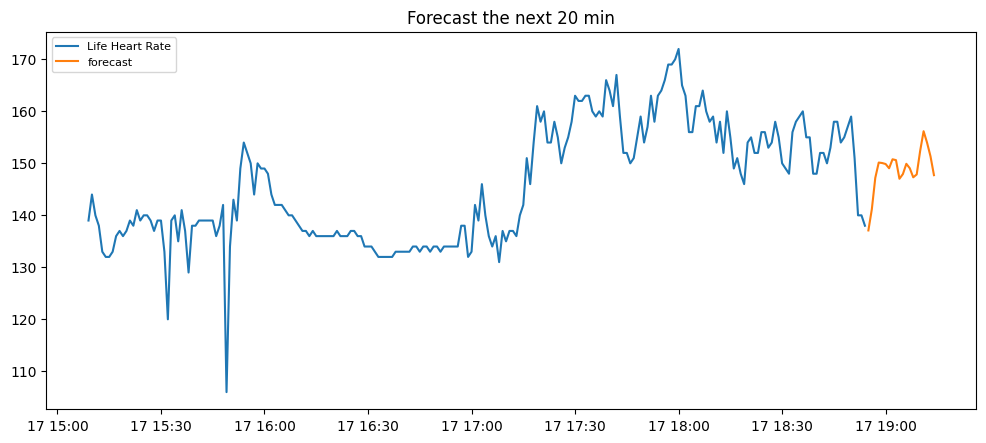

In [ ]:
#confidence interval

plt.figure(figsize=(12,5), dpi=100)
plt.plot(LHR_ex, label='Life Heart Rate')
plt.plot(final_ex_prediction['Lifetouch Heart Rate'], label='forecast')

plt.title('Forecast the next 20 min')
plt.legend(loc='upper left', fontsize=8)
plt.show()

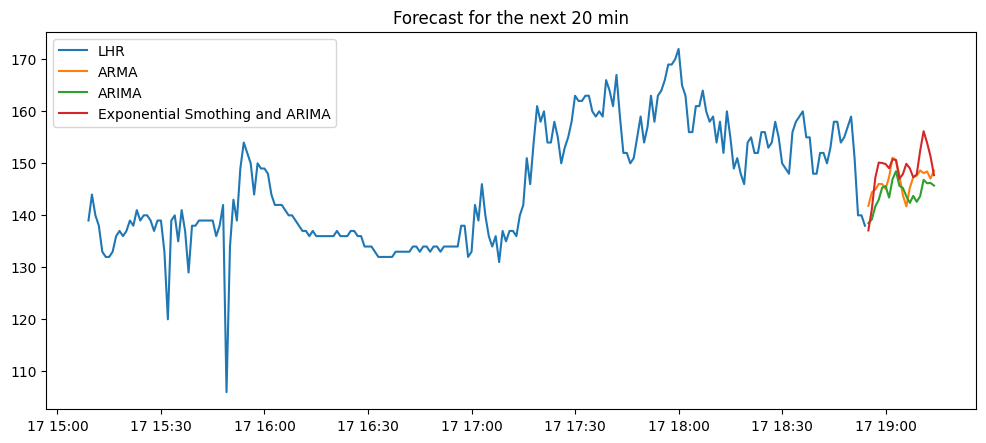

In [ ]:
# Plot
plt.figure(figsize=(12,5) ,dpi=100)
plt.plot(LHR_arma, label='LHR')
plt.plot(res_final['Lifetouch Heart Rate'][226:], label='ARMA')    
plt.plot(final_arima_prediction, label='ARIMA') 

plt.plot(final_ex_prediction, label = 'Exponential Smothing and ARIMA')           
plt.title('Forecast for the next 20 min')
plt.legend(loc='upper left')
plt.show()  

# SARIMAX with log and differensing

# Export the dataset

In [ ]:
data = {'ARMA':res_final['Lifetouch Heart Rate'][226:], 'ARIMA':final_arima_prediction['Lifetouch Heart Rate'], 
        'Ex and ARIMA':final_ex_prediction['Lifetouch Heart Rate'] }

predictions_df = pd.DataFrame(data)
predictions_df

,ARMA,ARIMA,Ex and ARIMA
2015-08-17 18:55:00,141.837511,138.477466,137.095562
2015-08-17 18:56:00,144.428267,139.215383,141.171020
2015-08-17 18:57:00,144.955886,141.707249,147.206927
2015-08-17 18:58:00,146.036042,142.987176,150.149328
2015-08-17 18:59:00,146.021849,145.336149,150.057168
2015-08-17 19:00:00,145.105636,145.615044,149.866922
2015-08-17 19:01:00,147.356975,143.411620,149.054042
2015-08-17 19:02:00,151.063013,146.942405,150.777559
2015-08-17 19:03:00,150.667459,148.478941,150.615838
2015-08-17 19:04:00,147.599893,145.669150,147.032965


In [ ]:
predictions_df.to_csv('TimeSeriesForcast.csv')